In [1]:
import os
from mdcrow import MDCrow

In [2]:
prompt13 = "Simulate trypsin (1TRN) for 1 ns at 300 K and plot energy over time. Compute SASA, RMSF, and radius of gyration. Get the subunit structure, sequence, active and binding sites."
llm_var = "claude-3-opus-20240229"
tools = "all"
agent = MDCrow(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-opus-20240229


In [3]:
agent.run(prompt13)

Thought: To simulate trypsin and analyze its properties, I will first download the PDB file, then set up and run a 1 ns simulation at 300 K. After that, I can compute and plot the energy over time, as well as calculate SASA, RMSF, and radius of gyration. Finally, I will retrieve information about the subunit structure, sequence, active sites, and binding sites from UniProt.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1TRN"
}
```

PDB file found with this ID: 1TRN
Here are the next steps to continue simulating and analyzing trypsin:

Thought: Now that I have the PDB file for trypsin, I can set up and run a 1 ns simulation at 300 K. I will use the SetUpandRunFunction tool to do this.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1TRN_204827",
    "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": "1.0 * nano

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_148
Files found in registry: 1TRN_204827: PDB file downloaded from RSCB
 PDBFile ID: 1TRN_204827
 1TRN_204858: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_204913: Initial positions for simulation sim0_204913
 sim0_204913: Basic Simulation of Protein 1TRN_204858
 rec0_204925: Simulation trajectory for protein 1TRN_204858 and simulation sim0_204913
 rec1_204925: Simulation state log for protein 1TRN_204858 and simulation sim0_204913
 rec2_204925: Simulation pdb frames for protein 1TRN_204858 and simulation sim0_204913
 sasa_trypsin: Total SASA values for trypsin
 fig0_032035: Plot of SASA over time for trypsin
 rmsf_trypsin: RMSF for trypsin
 fig0_032045: RMSF plot for trypsin
 rgy_rec0_204925: Radii of gyration per frame for rec0_204925


In [5]:
import os
from IPython.display import Image

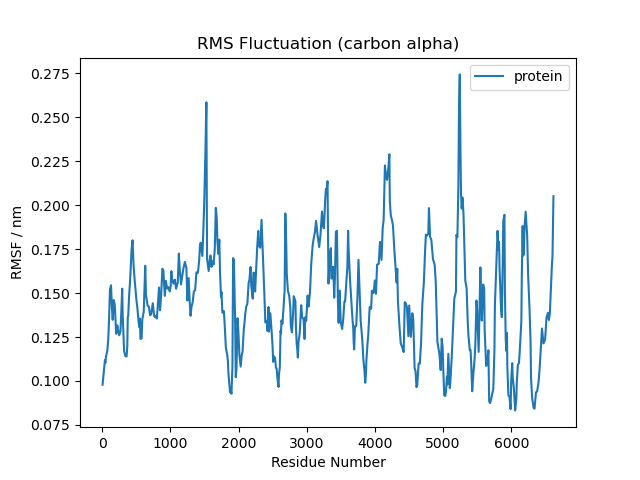

In [7]:
rms = registry.get_mapped_path("fig0_032045")
assert os.path.exists(rms), "Path does not exist"
Image(filename=rms)

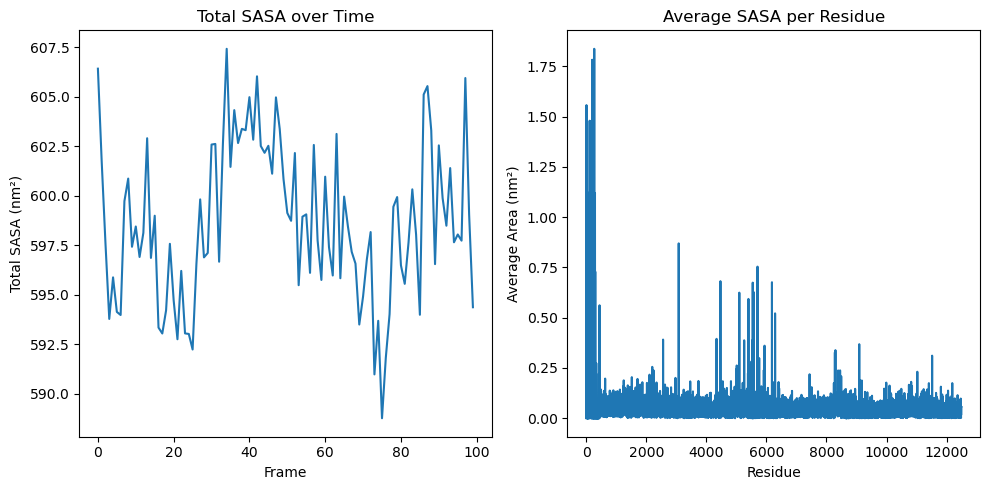

In [8]:
sasa = registry.get_mapped_path("fig0_032035")
assert os.path.exists(sasa), "Path does not exist"
Image(filename=sasa)